# Part 1

In [1]:
import pandas as pd

"""
inst: Institution code
time: Survival time in days
status: censoring status 1=censored, 2=dead
age: Age in years
sex: Male=1 Female=2
ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50%

of the day but not bedbound, 4 = bedbound

ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
pat.karno: Karnofsky performance score as rated by patient
meal.cal: Calories consumed at meals
wt.loss: Weight loss in last six months
"""

dataset = pd.read_csv("lung.csv")
dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
223,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
224,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,1,58,2,1.0,80.0,90.0,1060.0,0.0


In [ ]:
# Data transformation
dataset.loc[dataset["status"]==1, "status"] = 0
dataset.loc[dataset["status"]==2, "status"] = 1
dataset.dropna(inplace=True)

dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
221,11.0,203,0,71,2,1.0,80.0,90.0,1025.0,0.0
224,13.0,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,0,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,0,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,0,58,2,1.0,80.0,90.0,1060.0,0.0


In [4]:
dataset.drop(columns="inst", inplace=True)

dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


## Cox Propotional Hazard

In [9]:
#CPH model
from lifelines import CoxPHFitter
cph_model = CoxPHFitter()
cph_model.fit(dataset,
              "time",
              event_col="status")

cph_model.print_summary()

Matplotlib is building the font cache; this may take a moment.


<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2025-04-05 08:31:34 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01           -0.01            0.03                0.99                1.03
sex       -0.55      0.57      0.20           -0.95           -0.16                0.39                0.85
ph.ecog    0.74      2.09      0.22            0.30            1.18                1.35                3.26
ph.karno   0.02      1.02      0.01            0.00            0.04                1.00                1.05
pat.karno -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.01      0.99      0.01           -0.03            0.00                0.97                1.00

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  0.93   0.35      1.51
sex          0.00 -2.75   0.01      7.37
ph.ecog      0.00  3.29 <0.005      9.95
ph.karno     0.00  2.00   0.05      4.45
pat.karno    0.00 -1.49   0.14      2.87
meal.cal     0.00  0.11   0.91      0.13
wt.loss      0.00 -1.83   0.07      3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

### Ploting

<Axes: xlabel='log(HR) (95% CI)'>

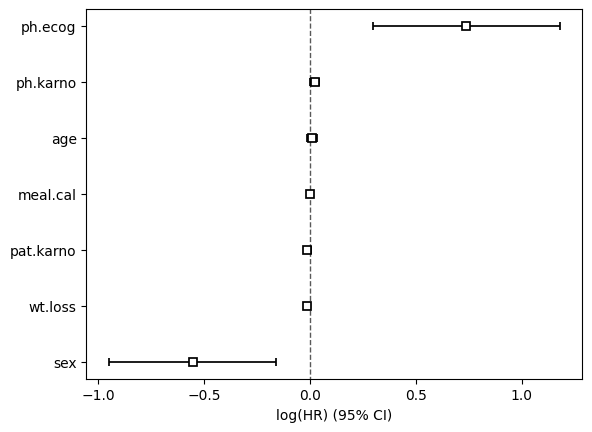

In [ ]:
cph_model.plot()